# Dhanvantri Jadhav

# Simple Linear Regression

In [ ]:
Simple Linear Regression to Predict the percentage of students on the basis of their study hours.

In [137]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [138]:
#Reading data from the link provided
url="http://bit.ly/w-data"
ds=pd.read_csv(url)
print("Data imported successfully")
ds.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [155]:
ds.describe() #looking at the attributes of our dataset

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


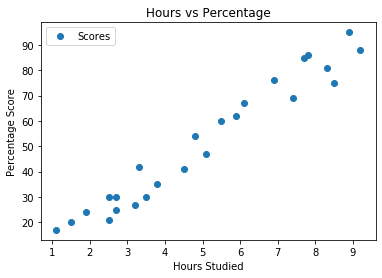

In [140]:
ds.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [162]:
from scipy import stats
# pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(ds.Hours, ds.Scores)

print(pearson_coef)

0.9761906560220884


# Preparing the Data

### Creating atrributes(inputs) and labels(outputs) from the given dataset.

In [142]:
X = ds.iloc[:, :-1].values  
y = ds.iloc[:, 1].values 

In [143]:
print(X[:5]) #printing the first 5 elements of X
print(y[:5]) #printing the first 5 elements of y

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]]
[21 47 27 75 30]


In [145]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Training the algorithm

In [147]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Done with Training the dataset.")

Done with Training the dataset.


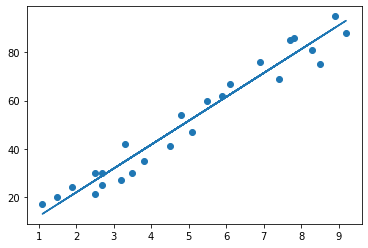

In [148]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

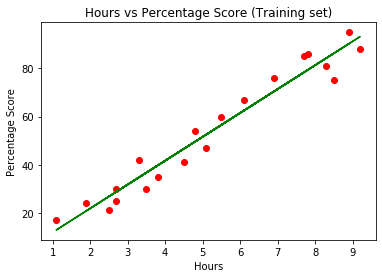

In [160]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, regressor.predict(X_train), color = "green")
plt.title("Hours vs Percentage Score (Training set)")
plt.xlabel("Hours")
plt.ylabel("Percentage Score")
plt.show()

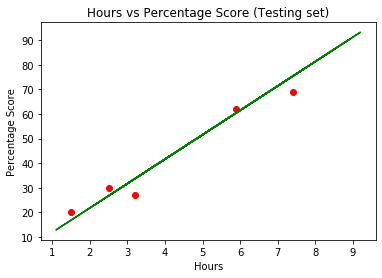

In [161]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_train, regressor.predict(X_train), color = "green")
plt.title("Hours vs Percentage Score (Testing set)")
plt.xlabel("Hours")
plt.ylabel("Percentage Score")
plt.show()

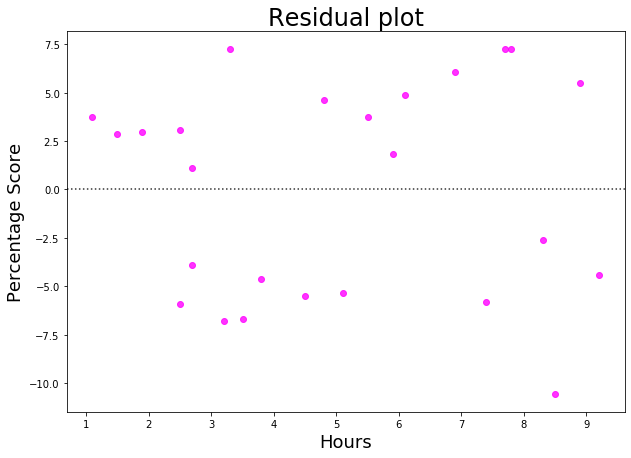

In [163]:
import seaborn as sns

# residual plot 
fig = plt.figure(figsize = (10, 7))
sns.residplot(ds.Hours, ds.Scores, color='magenta')

# title and labels
plt.title('Residual plot', size=24)
plt.xlabel('Hours', size=18)
plt.ylabel('Percentage Score', size=18);


# Making Predicitions

In [149]:
y_pred = regressor.predict(X_test) #Predicting the scores

In [150]:
#Comparing our model by checking the actual VS predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [151]:
#checking the predicted score for 9.25 hours
print('Predicted percentage score for a student who studies for 9.25 hrs/ day is:')
print(regressor.predict([[9.25]]))

Predicted percentage score for a student who studies for 9.25 hrs/ day is:
[93.69173249]


# Evaluating the model

In [152]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [153]:
print('Mean Sqaured Error:',metrics.mean_squared_error(y_test, y_pred))

Mean Sqaured Error: 21.5987693072174


In [154]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 4.6474476121003665
